In [2]:
from model import Gadget
import pandas as pd
from plotting import plot_conc_and_surf_flux, plot_fission_rate_and_energy, plot_neutron_counts, plot_radius_and_pressure, generic_timeseries_plot
from simulation import Simulation

### Effect of compression ratio/initial density
* In this example, we vary the initial compression ratio to simulate a core that is compressed via implosion. An initial neutron burst in the core is provided at the first time step

#### Make 3 spheres with a uncompressed critical radius, but varying initial density (1, 1.1, and 1.2 * rho)

In [3]:
g0 = Gadget(id = 0,
           material = 'U235',
           mass_kg = None,
           initial_radius_m = 0.084,
           initial_density_multiplier = 1.0,
           initial_neutron_conc_perm3 = 0,
           initial_neutron_burst_conc_perm3 = 310000000, # ~8 neutrons
           time_step_s = 3E-10,
           num_points_radial = 100,
           neutron_multiplication_on = True,
           tamper_mass_kg = 0)

g1 = Gadget(id = 1,
           material = 'U235',
           mass_kg = None,
           initial_radius_m = 0.084,
           initial_density_multiplier = 1.1,
           initial_neutron_conc_perm3 = 0,
           initial_neutron_burst_conc_perm3 = 310000000, # ~8 neutrons
           time_step_s = 3E-10,
           num_points_radial = 100,
           neutron_multiplication_on = True,
           tamper_mass_kg = 0)

g2 = Gadget(id = 2,
           material = 'U235',
           mass_kg = None,
           initial_radius_m = 0.084,
           initial_density_multiplier = 1.2,
           initial_neutron_conc_perm3 = 0,
           initial_neutron_burst_conc_perm3 = 310000000, # ~8 neutrons
           time_step_s = 3E-10,
           num_points_radial = 100,
           neutron_multiplication_on = True,
           tamper_mass_kg = 0)

gadget_list = []
gadget_list.extend((g0, g1, g2))


Establishing mass of 46.45 kg from radius of 8.40 cm
Establishing mass of 51.10 kg from radius of 8.40 cm
Establishing mass of 55.74 kg from radius of 8.40 cm


#### Run the simulations

In [4]:
for g in gadget_list:
    print(f'Working on gadget id {g.id}')
    for i in range(8000):
        if g.states[-1].cumulative_number_of_fissions >= g.number_active_nuclei:
            print('All active nuclei fissioned')
            break
        if g.states[-1].density_kgperm3 < 0.5 * g.states[0].density_kgperm3:
            print('Density reached 50% initial value')
            break
        g.run_sim_step()
    g.post_process()
    print(f'Done with gadget id {g.id}\n')

Working on gadget id 0
Done with gadget id 0

Working on gadget id 1
Density reached 50% initial value
Done with gadget id 1

Working on gadget id 2
Density reached 50% initial value
Done with gadget id 2



#### How does the neutron population change over time?

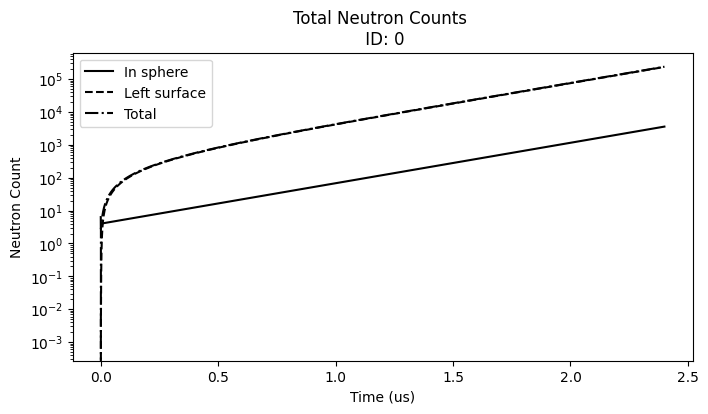

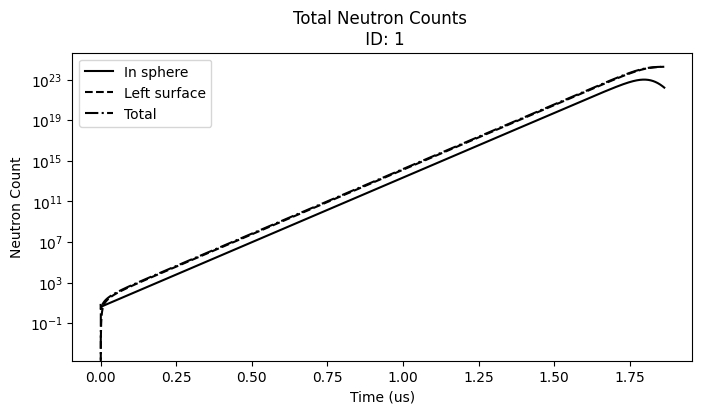

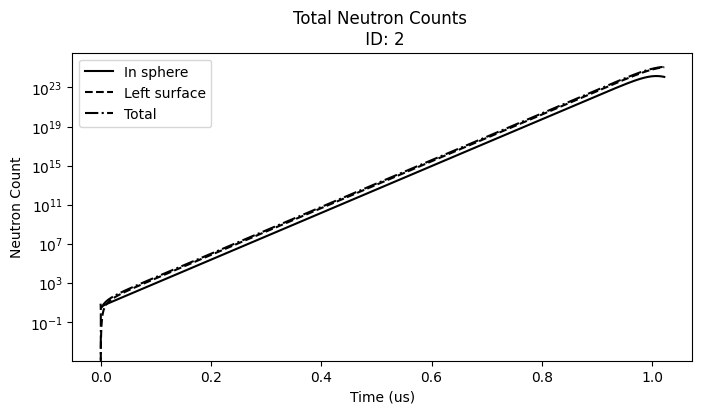

In [5]:
plot_neutron_counts(gadget = g0)
plot_neutron_counts(gadget = g1)
plot_neutron_counts(gadget = g2)

#### What does the explosive yield look like?

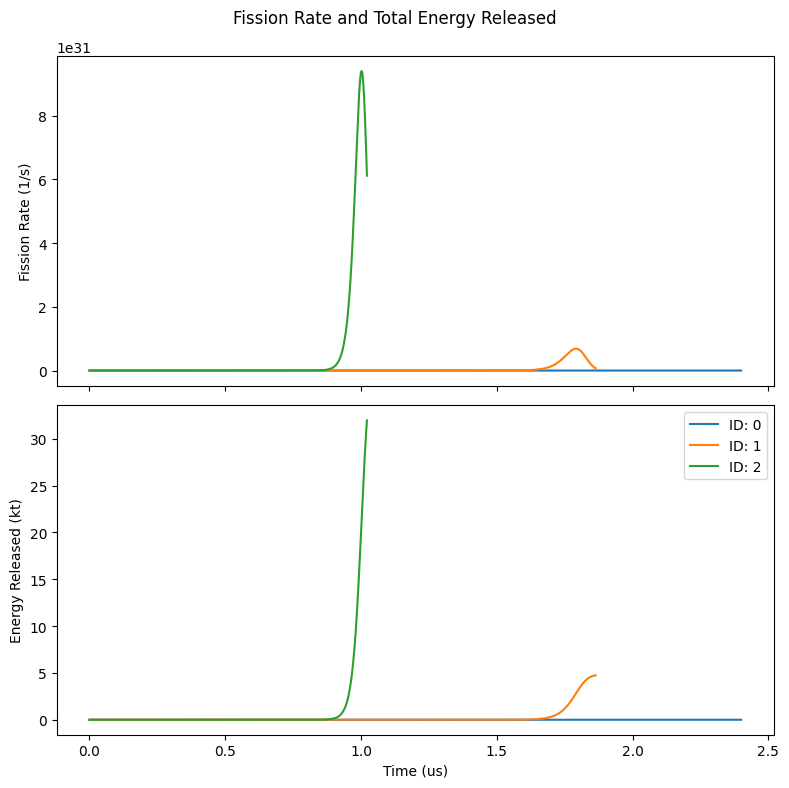

In [6]:
plot_fission_rate_and_energy(gadget_list=gadget_list)

#### How does the pressure and radius vary with time?

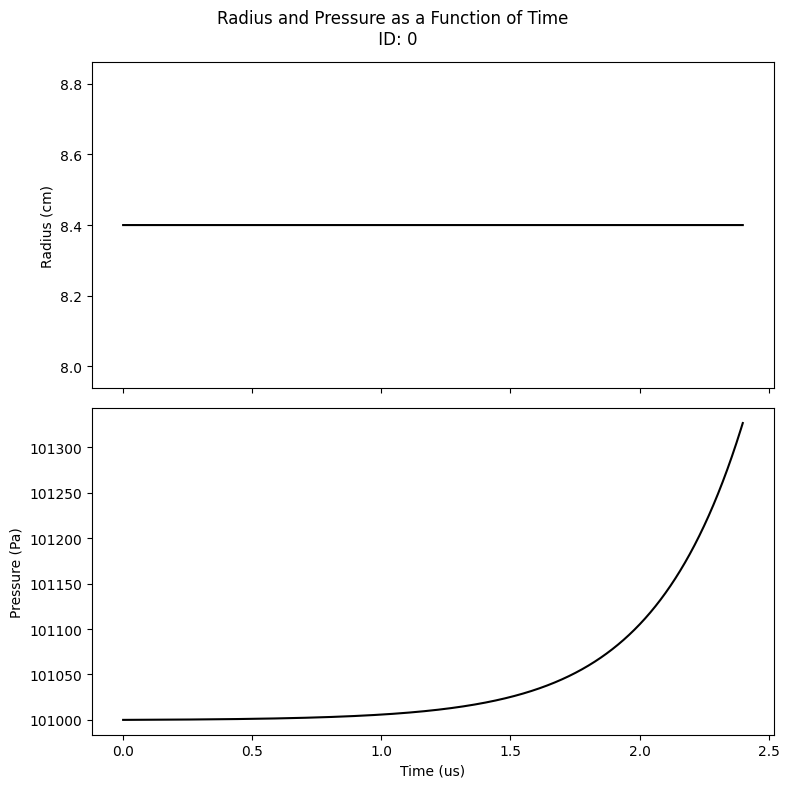

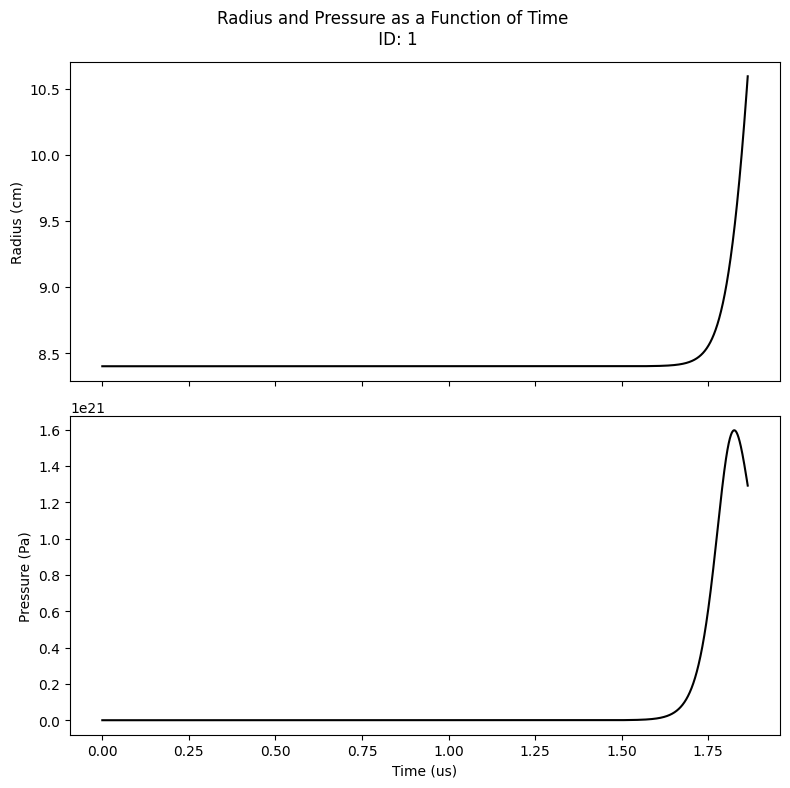

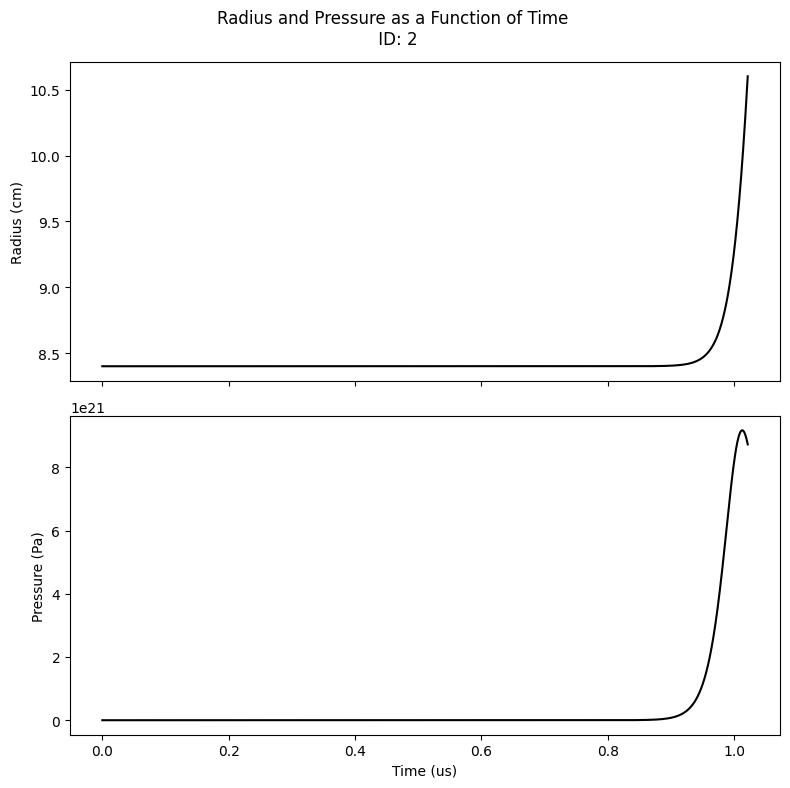

In [7]:
plot_radius_and_pressure(gadget=g0)
plot_radius_and_pressure(gadget=g1)
plot_radius_and_pressure(gadget=g2)